# 1. Import Dependencies

In [1]:
import pandas as pd # Import pandas
from prophet import Prophet

# 2. Load Data

In [2]:
excel_file = 'SalesData.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file, sheet_name='sales_data')

In [3]:
df.head()

,Date,DailySalesQuantity,IsHoliday,IsWeekend,IsOffSeason
0,2022-01-01,83581,1,1,0
1,2022-01-02,92236,0,1,0
2,2022-01-03,92613,0,0,0
3,2022-01-04,83567,0,0,0
4,2022-01-05,94790,0,0,0


In [4]:
df.dtypes

Date                  datetime64[ns]
DailySalesQuantity             int64
IsHoliday                      int64
IsWeekend                      int64
IsOffSeason                    int64
dtype: object

# 3. Apply Data Preprocessing

In [9]:
frame = df[['Date', 'DailySalesQuantity']].copy()

In [11]:
frame.columns = ['ds', 'y']
frame.head()

,ds,y
0,2022-01-01,83581
1,2022-01-02,92236
2,2022-01-03,92613
3,2022-01-04,83567
4,2022-01-05,94790


In [26]:
frame.tail()

,ds,y
634,2023-09-27,83469
635,2023-09-28,78518
636,2023-09-29,68608
637,2023-09-30,74082
638,2023-10-01,71599


# 4. Create Time Series Model

In [12]:
m = Prophet(interval_width=0.95) 

In [13]:
training_run = m.fit(frame)

10:19:38 - cmdstanpy - INFO - Chain [1] start processing
10:19:38 - cmdstanpy - INFO - Chain [1] done processing


# 5. Evaluate Model

In [14]:
future = m.make_future_dataframe(periods=30, freq='D')

In [15]:
forecast = m.predict(future)

In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,94202.967346,79905.106533,102080.209107,94202.967346,94202.967346,-3369.886708,-3369.886708,-3369.886708,-3369.886708,-3369.886708,-3369.886708,0.0,0.0,0.0,90833.080638
1,2022-01-02,93989.715980,87901.035540,109950.790295,93989.715980,93989.715980,4286.072594,4286.072594,4286.072594,4286.072594,4286.072594,4286.072594,0.0,0.0,0.0,98275.788574
2,2022-01-03,93776.464614,86352.361398,108957.322224,93776.464614,93776.464614,4090.076318,4090.076318,4090.076318,4090.076318,4090.076318,4090.076318,0.0,0.0,0.0,97866.540931
3,2022-01-04,93563.213247,78911.109611,100597.572137,93563.213247,93563.213247,-3555.150892,-3555.150892,-3555.150892,-3555.150892,-3555.150892,-3555.150892,0.0,0.0,0.0,90008.062355
4,2022-01-05,93349.961881,87122.664559,109938.922332,93349.961881,93349.961881,5917.992082,5917.992082,5917.992082,5917.992082,5917.992082,5917.992082,0.0,0.0,0.0,99267.953963


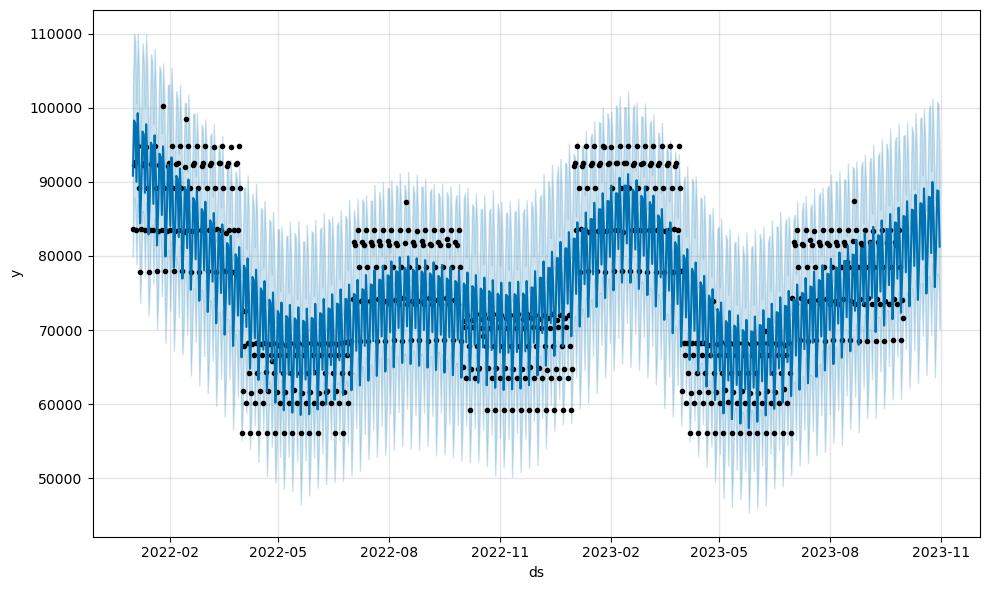

In [17]:
plot1 = m.plot(forecast)

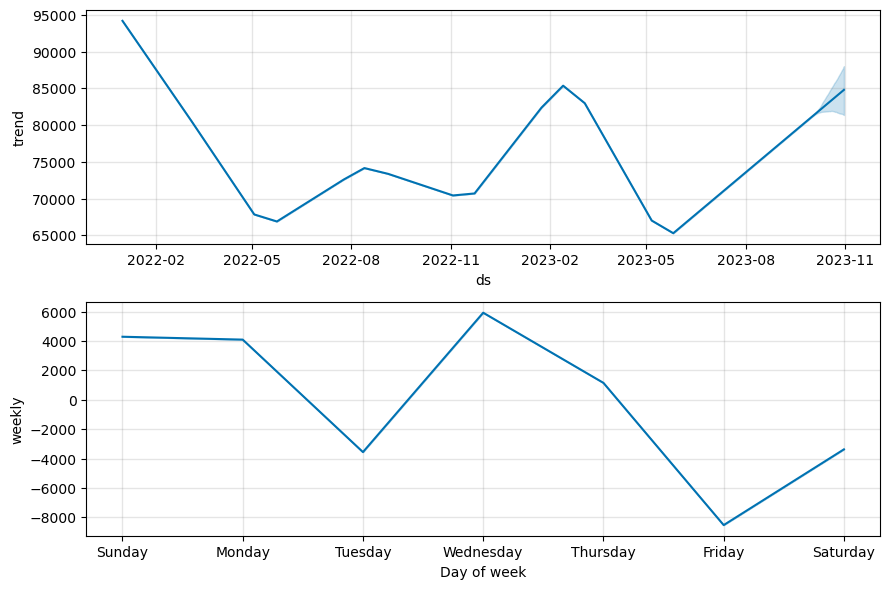

In [18]:
plot2 = m.plot_components(forecast)

In [27]:
print(forecast[['ds', 'yhat']].tail(31))

            ds          yhat
638 2023-10-01  85388.919014
639 2023-10-02  85316.411371
640 2023-10-03  77794.672795
641 2023-10-04  87391.304402
642 2023-10-05  82745.874246
643 2023-10-06  73202.112902
644 2023-10-07  78473.891513
645 2023-10-08  86253.339449
646 2023-10-09  86180.831806
647 2023-10-10  78659.093230
648 2023-10-11  88255.724837
649 2023-10-12  83610.294681
650 2023-10-13  74066.533337
651 2023-10-14  79338.311948
652 2023-10-15  87117.759884
653 2023-10-16  87045.252241
654 2023-10-17  79523.513665
655 2023-10-18  89120.145272
656 2023-10-19  84474.715116
657 2023-10-20  74930.953772
658 2023-10-21  80202.732383
659 2023-10-22  87982.180319
660 2023-10-23  87909.672676
661 2023-10-24  80387.934100
662 2023-10-25  89984.565707
663 2023-10-26  85339.135551
664 2023-10-27  75795.374207
665 2023-10-28  81067.152818
666 2023-10-29  88846.600754
667 2023-10-30  88774.093111
668 2023-10-31  81252.354535
